In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**List yang kurang:**
- plotting relationship (bikin scatter plot) (v)
- masukkin korelasi ke kesimpulan (v)
- kolom yang gaterlalu berguna didrop aja (v)
- deskripsiin dalam juta di grafiknya (v)
- heatmap (korelasi) (v)
- tema dari grafiknya mungkin bisa diubah

# 1. Deskripsi dan Karakteristik Data

In [3]:
df = pd.read_csv("vgsales.csv")
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


_Tabel 1.1 Data Penjualan Video Game_

Data ini merupakan data penjualan video game yang diambil dari https://www.kaggle.com/gregorut/videogamesales.
Di data ini ditampilkan nama game, platform, tahun rilis, genre, publisher, penjualan tiap region, dan penjualan global.
Berupa file csv dengan dimensi 16598 x 11.

In [4]:
df.sort_values("Global_Sales", ascending = False).head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


_Tabel 1.2 Date Penjualan Video Game 10 Teratas_

Bisa dilihat bahwa data yang kami dapatkan, dari awalnya sudah tersort berdasarkan penjualan. Sehingga, bisa diambil kesimpulan bahwa kolom "Rank" merupakan data jenis Quantitative-Continues karena dapat berubah berdasarkan penjualan di tahun-tahun kedepannya.

In [5]:
df["Year"].max()

2020.0

Tahun maksimum dari data ini adalah 2020 yang berarti ini merupakan hasil data penjualan kumulatif dari tahun rilis hingga 2020.

In [6]:
df["Name"].nunique()

11493

Pada kolom "Name" terdapat kejanggalan yaitu jumlah dari elemen unik yang ada pada data hanya berjumlah 11493 dibanding dengan banyaknya baris yaiyu 16598. Ini berarti ada judul dari game yang sama. Bisa jadi kesalahan dari datau atau juga bisa berarti ada publisher yang merilis game dengan judul yang sama.

Data pada "Name" berjenis Categorical-Nominal karena berisi nama dari game.

In [7]:
df.groupby("Platform").count()[["Name"]]

,Name
Platform,
2600,133
3DO,3
3DS,509
DC,52
DS,2163
GB,98
GBA,822
GC,556
GEN,27


_Tabel 1.3 Data Penjualan Video Game berdasarkan Platform_

Kolom "Platform" mendeskripsikan tentang Platfrom game tersebut dimainkan. Sesuai dengan tabel di atas terdapat 31 Platfrom. Data ini termasuk kategori Categorical - Nomical.

In [8]:
len(df.groupby("Platform").count().index)

31

In [9]:
df.sort_values("Year").head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
6896,6898,Checkers,2600,1980.0,Misc,Atari,0.22,0.01,0.0,0.00,0.24
2669,2671,Boxing,2600,1980.0,Fighting,Activision,0.72,0.04,0.0,0.01,0.77
5366,5368,Freeway,2600,1980.0,Action,Activision,0.32,0.02,0.0,0.00,0.34
1969,1971,Defender,2600,1980.0,Misc,Atari,0.99,0.05,0.0,0.01,1.05
1766,1768,Kaboom!,2600,1980.0,Misc,Activision,1.07,0.07,0.0,0.01,1.15


_Tabel 1.4 Sampel Data Penjualan Video Game berdasarkan Tahun_

Kolom "Year" mendeskripsikan tahun rilis dari game tersebut. Dengan nilai range antara 1980 - 2020 yang berarti terdapat 40 tahun data yang terdapat di data ini. Kategori dari kolom ini adalah Quantitave - Discrete karena tahun rilis tidak dapat berubah nilainya.

In [10]:
df.groupby("Genre").count()[["Name", "Global_Sales"]]

,Name,Global_Sales
Genre,,
Action,3316,3316
Adventure,1286,1286
Fighting,848,848
Misc,1739,1739
Platform,886,886
Puzzle,582,582
Racing,1249,1249
Role-Playing,1488,1488
Shooter,1310,1310


_Tabel 1.5 Sampel Data Penjualan Video game berdasarkan Genre_

Kolom "Genre" mendeskripsikan tentang Genre dari game tersebut. Dengan sekitar genre utama sebanyak 11 genre dan 1 genre Misc yang berarti genre lainnya. Kolom "Genre" termasuk dalam kategori Categorical-Nominal.

In [11]:
df.iloc[35:40,:] # Sampel Acak

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
35,36,Call of Duty: Black Ops II,X360,2012.0,Shooter,Activision,8.25,4.30,0.07,1.12,13.73
36,37,Call of Duty: Modern Warfare 2,X360,2009.0,Shooter,Activision,8.52,3.63,0.08,1.29,13.51
37,38,Call of Duty: Modern Warfare 3,PS3,2011.0,Shooter,Activision,5.54,5.82,0.49,1.62,13.46
38,39,Grand Theft Auto III,PS2,2001.0,Action,Take-Two Interactive,6.99,4.51,0.30,1.30,13.10
39,40,Super Smash Bros. Brawl,Wii,2008.0,Fighting,Nintendo,6.75,2.61,2.66,1.02,13.04


_Tabel 1.6 Sampel Acak Data Penjualan Video Game_

Kolom dari "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales" merupakan banyaknya game itu terjual dalam satuan juta dan "Global_Sales" berarti total penjualan dari tiap daerahya. Data ini diurutkan berdasarakan "Glboal_Sales"-nya dan kategori dari penjualan ini adalah Quantitative-Continues karena dapat bertambah setiap tahunnya.

Dari analisis di atas dapat diambil kesimpulan, jenis data yang ditampilkan di tabel:
- Rank (Peringkat penjualan dari game tersebut) : Quantitave - Continues
- Name (Nama dari game) : Categorical - Nominal
- Platform (Plaform game tersebut dimainkan) : Categorical - Nominal
- Year (Tahun rilis dari game tersebut) : Quantitative - Discrete
- Genre (Kategori game tersebut) : Categorical - Nominal
- NA_Sales, EU_Sales, JP_Sales (Penjualan tiap game di America, Eropa, dan Jepang dalam juta) : Quantitative - Continues
- Other_Sales (Penjualan tiap game di luar America, Eropa, dan Jepang dalam juta) : Quantitavie - Continues
- Global_Sales (Penjualan tiap game dari total dari semua daerah dalam juta) : Quantitave - Continues

# 2. Analisis Data

In [12]:
stat = df.describe()
stat

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


_Tabel 2.1 Statistik Seluruh Data_

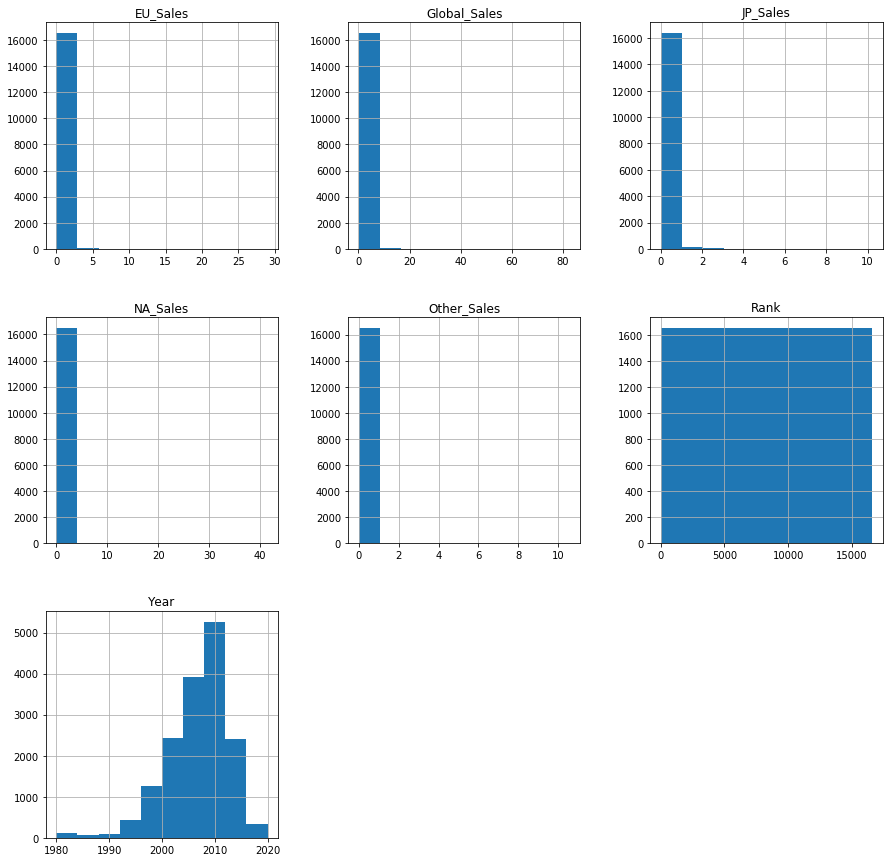

In [13]:
df.hist(figsize=(15,15))
plt.show()

_Grafik 2.1 Histogram Setiap Kolom_

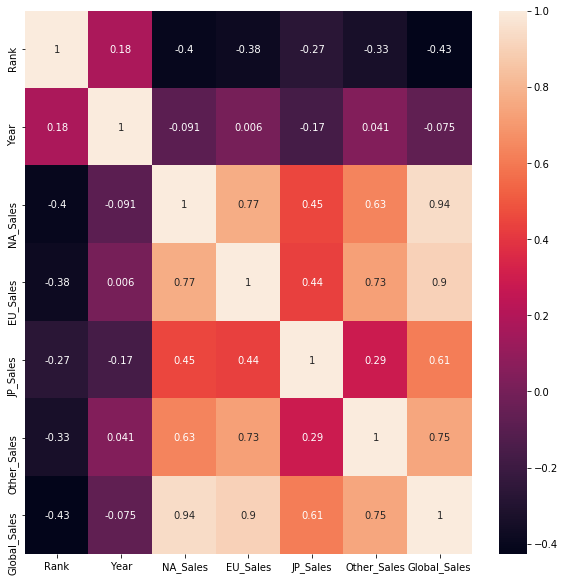

In [108]:
heatmap = df[["Rank","Year","NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]]
plt.figure(figsize=(10,10))
sns.heatmap(heatmap.corr(), annot=True)
plt.show()

_Korelasi dari tiap data numerik_

Berikut adalah statistik dari setiap kategori datanya.

## Rank

In [14]:
# Sampel Data Baris Pertama
df.head(3)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82


_Tabel 2.2 Sampel 1 Data Penjualan Video Game_

In [15]:
# Sampel Data Baris Terakhir
df.tail(3)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


_Tabel 2.3 Sampel 2 Data Penjualan Video Game_

In [16]:
# Sampel Data Acak
df.iloc[78:81, :]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
78,79,Wii Party,Wii,2010.0,Misc,Nintendo,1.79,3.53,2.49,0.68,8.49
79,80,Halo 2,XB,2004.0,Shooter,Microsoft Game Studios,6.82,1.53,0.05,0.08,8.49
80,81,Mario Party 8,Wii,2007.0,Misc,Nintendo,3.81,2.30,1.58,0.73,8.42


_Tabel 2.4 Sampel 3 Data Penjualan Video Game_

In [17]:
stat.iloc[:, 0:1]

,Rank
count,16598.000000
mean,8300.605254
std,4791.853933
min,1.000000
25%,4151.250000
50%,8300.500000
75%,12449.750000
max,16600.000000


_Tabel 2.5 Tabel Data Penjualan Video Game berdasarkan Frekuensi Game per Rank_

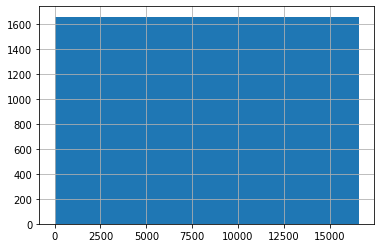

In [18]:
df["Rank"].hist()
plt.show()

_Grafik 2.2 Penjualan Video Game berdasarkan Frekuensi Game per Rank_

Seperti yang terlihat pada Histogram sebaran "Rank", nilai sebarannya terdistribusi secara merata karena hanya dapat 1 nilai yang menempati 1 rank. Nilai dari rank ini hanya berperan sebagai index karena data sudah ter-sort berdasarkan "Global_Sales".

## Name

In [63]:
# Sampel Data 
name_count = df.groupby("Name").count()[["Rank"]]
name_count

,Rank
Name,
'98 Koshien,1
.hack//G.U. Vol.1//Rebirth,1
.hack//G.U. Vol.2//Reminisce,1
.hack//G.U. Vol.2//Reminisce (jp sales),1
.hack//G.U. Vol.3//Redemption,1
...,...
thinkSMART: Chess for Kids,1
uDraw Studio,1
uDraw Studio: Instant Artist,2


_Tabel 2.6 Penjualan Video Game berdasarkan Frekuensi Game per Name_

In [64]:
# Sampel Data
name_count.iloc[113:117, :]

,Rank
Name,
AKB1/48: Idol to Koishitara...,1
AKB48+Me,1
AMF Bowling 2004,1
AMF Bowling Pinbusters!,2


_Tabel 2.7 Sampel 1 Data Penjualan Video Game berdasarkan Frekuensi Game per Name_

In [65]:
# Sampel Data
df.loc[df["Name"] == "AMF Bowling Pinbusters!"]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
2274,2276,AMF Bowling Pinbusters!,Wii,2007.0,Sports,Bethesda Softworks,0.85,0.0,0.0,0.07,0.91
12025,12027,AMF Bowling Pinbusters!,DS,2008.0,Sports,Vir2L Studios,0.06,0.0,0.0,0.00,0.07


_Tabel 2.8 Sampel 2 Data Penjualan Video Game berdasarkan Frekuensi Game per Name_

In [66]:
# Sampel Data
df.loc[df["Name"] == "uDraw Studio: Instant Artist"]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
7835,7837,uDraw Studio: Instant Artist,Wii,2011.0,Misc,THQ,0.08,0.09,0.0,0.02,0.19
15523,15526,uDraw Studio: Instant Artist,X360,2011.0,Misc,THQ,0.01,0.01,0.0,0.00,0.02


_Tabel 2.9 Sampel 3 Data Penjualan Video Game berdasarkan Frekuensi Game per Name_

Dari tabel di atas, terlihat bahwa banyaknya baris pada kolom "Name" hanya 11.493, lebih sedikit jika dibandingkan dengan baris total yang berjumlah 16.598. Ini berarti ada nama game yang sama dang terinput lebih dari satu kali ke dalam data. Seperti yang terlihat di tabel, terdapat sampel game yang dipublish oleh Publisher yang berbeda dan ada yang dipublish di platform yang berbeda atau keduanya.

## Platform

In [67]:
platform_count = df.groupby("Platform").count().sort_values("Name")[["Name"]]
platform_count

,Name
Platform,
GG,1
PCFX,1
TG16,2
3DO,3
WS,6
SCD,6
NG,12
GEN,27
DC,52


_Tabel 2.10 Data Penjualan Video Game berdasarkan Frekuensi Game per Platform_

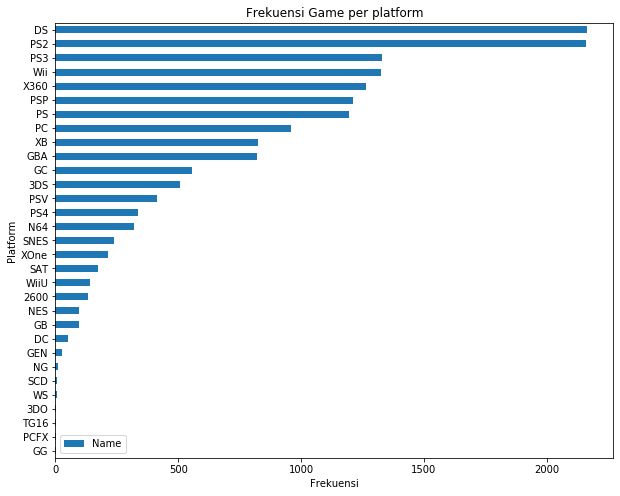

In [74]:
platform_count.plot(kind="barh", y="Name", title="Frekuensi Game per platform", figsize=[10, 8])
plt.xlabel("Frekuensi")
plt.show()

_Grafik 2.3 Penjualan Video Game berdasarkan Frekuensi Game per Platform_

Dari grafik di atas, terlihat banyaknya judul yang dirilis di tiap plaform. Dan terlihat yang paling banyak adalah platfrom DS dan yang paling sedikit adalah platform GG.

In [75]:
platform_sales = df.groupby("Platform").sum().sort_values("Global_Sales")[["Global_Sales"]]
platform_sales

,Global_Sales
Platform,
PCFX,0.03
GG,0.04
3DO,0.10
TG16,0.16
WS,1.42
NG,1.44
SCD,1.87
DC,15.97
GEN,28.36


_Tabel 2.11 Data Penjualan Video Game berdasarkan Total Global Sales per Platform_

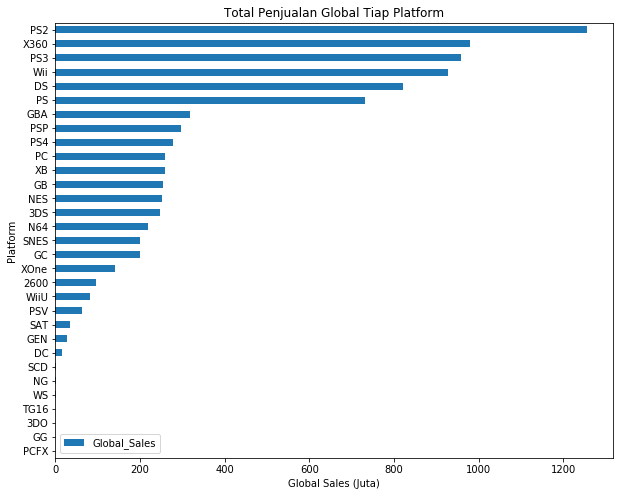

In [77]:
platform_sales.plot(kind="barh", y="Global_Sales", title="Total Penjualan Global Tiap Platform", figsize=[10,8])
plt.xlabel("Global Sales (Juta)")
plt.show()

_Grafik 2.4 Penjualan Video Game berdasarkan Total Global Sales per Platform_

Dari tabel dan grafik, terlihat bahwa penjualan game paling banyak adalah di platform "PS2" dan yang paling sedikit adalah "PCFX".

In [124]:
platform_sales["Global_Sales"].corr(platform_count["Name"])

0.9016858199240844

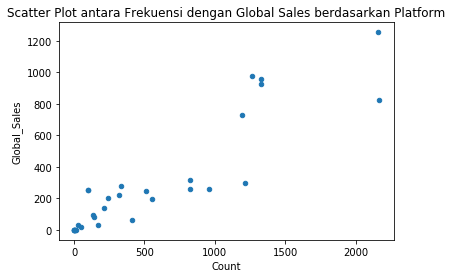

In [126]:
platform_scatter = pd.DataFrame({"Count": df.groupby("Platform").count()["Name"], "Global_Sales": df.groupby("Platform").sum()["Global_Sales"]})
platform_scatter.plot(kind="scatter", x="Count", y="Global_Sales", title="Scatter Plot antara Frekuensi dengan Global Sales berdasarkan Platform")
plt.show()

Berdasarkan nilai korelasi 0,901, didapat bahwa banyaknya game yang dirilis dari platform dan banyaknya penjualan game dari platform berbanding lurus. Ini berarti menunjukkan bahwa semakin banyaknya game yang dirilis di suatu platform maka akan menghasilkan semakin banyak penjualan game juga

## Genre

In [27]:
genre_count = df.groupby("Genre").count().sort_values("Name")
genre_count[["Name"]]

,Name
Genre,
Puzzle,582
Strategy,681
Fighting,848
Simulation,867
Platform,886
Racing,1249
Adventure,1286
Shooter,1310
Role-Playing,1488


_Tabel 2.12 Data Penjualan Video Game berdasarkan Frekuensi Game per genre_

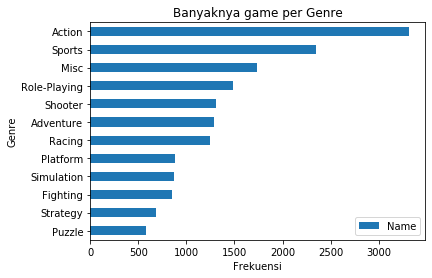

In [80]:
genre_count.plot(kind="barh",y="Name",title="Banyaknya game per Genre")
plt.xlabel("Frekuensi")
plt.show()

_Grafik 2.5 Penjualan Video Game berdasrkan Frekuensi Game per genre_

Dari grafik dan tabel di atas, genre Action memiliki judul game paling banyak.

In [29]:
genre_sales = df.groupby("Genre").sum().sort_values("Global_Sales")
genre_sales[["Global_Sales"]]

,Global_Sales
Genre,
Strategy,175.12
Adventure,239.04
Puzzle,244.95
Simulation,392.20
Fighting,448.91
Racing,732.04
Misc,809.96
Platform,831.37
Role-Playing,927.37


_Tabel 2.13 Data Penjualan Video Game berdasrkan Total Global Sales per Genre_

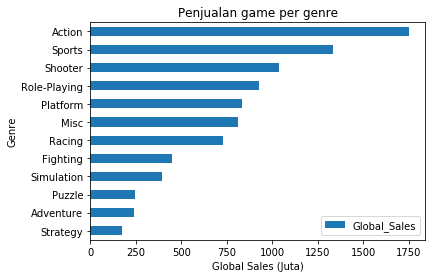

In [81]:
genre_sales.plot(kind="barh", y="Global_Sales", title="Penjualan game per genre")
plt.xlabel("Global Sales (Juta)")
plt.show()

_Grafik 2.6 Penjualan Video Game berdasrkan Total Global Sales per Genre_

Dari grafik dan tabel di atas, genre Action memiliki total penjualan global yang paling tinggi.

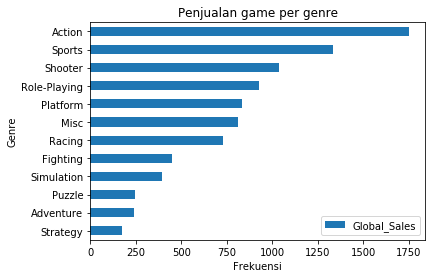

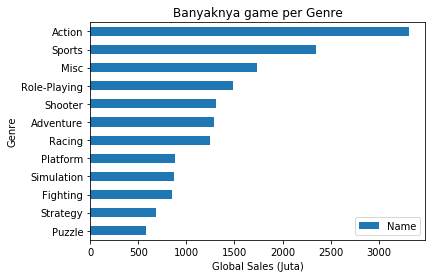

In [83]:
genre_sales.plot(kind="barh", y="Global_Sales", title="Penjualan game per genre")
plt.xlabel("Frekuensi")
genre_count.plot(kind="barh",y="Name",title="Banyaknya game per Genre")
plt.xlabel("Global Sales (Juta)")
plt.show()

_Perbandingan Grafik 2.5 dan 2.6_

In [111]:
genre_sales["Global_Sales"].corr(genre_count["Name"])

0.8892183563139285

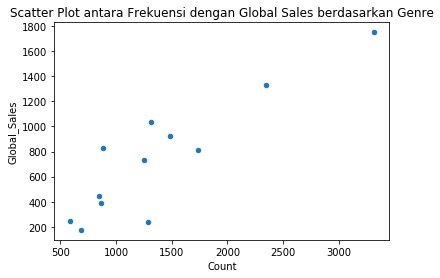

In [119]:
genre_scatter = pd.DataFrame({"Count": df.groupby("Genre").count()["Name"], "Global_Sales": df.groupby("Genre").sum()["Global_Sales"]})
genre_scatter.plot(kind="scatter", x="Count", y="Global_Sales", title="Scatter Plot antara Frekuensi dengan Global Sales berdasarkan Genre")
plt.show()

Dari perbandingan 2 grafik dan nilai korelasi 0.89 yang berbanding lurus, didapat bahwa banyaknya game yang dibuat per genre akan menghasilkan banyaknya penjualan game per genre juga. Walaupun, peringkat dari 2 data tersebut tidak sama persis, tetapi memberikan kemiripan.

## Publisher

In [33]:
df.groupby("Publisher").count().sort_values("Name", ascending=False)

,Rank,Name,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Publisher,,,,,,,,,,
Electronic Arts,1351,1351,1351,1339,1351,1351,1351,1351,1351,1351
Activision,975,975,975,966,975,975,975,975,975,975
Namco Bandai Games,932,932,932,928,932,932,932,932,932,932
Ubisoft,921,921,921,918,921,921,921,921,921,921
Konami Digital Entertainment,832,832,832,823,832,832,832,832,832,832
...,...,...,...,...,...,...,...,...,...,...
Playmates,1,1,1,1,1,1,1,1,1,1
Playmore,1,1,1,1,1,1,1,1,1,1
Plenty,1,1,1,1,1,1,1,1,1,1


_Tabel 2.14 Data Penjualan Video Game berdasarkan Frekuensi Game per Publisher_

Terlihat dari tabel di atas, terdapat 578 publisher di dalam data ini. Jadi, data yang dianalisis di bawah ini hanya menampilkan 10 teratas dari publisher.

In [34]:
publisher_count = df.groupby("Publisher").count().sort_values("Name", ascending=False).head(10)
publisher_count[["Name"]]

,Name
Publisher,
Electronic Arts,1351
Activision,975
Namco Bandai Games,932
Ubisoft,921
Konami Digital Entertainment,832
THQ,715
Nintendo,703
Sony Computer Entertainment,683
Sega,639


_Tabel 2.15 Data Penjualan Video Game berdasarkan Frekuensi Game per Publisher 10 Teratas_

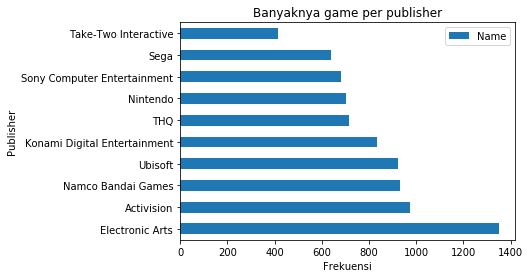

In [85]:
publisher_count.plot(kind="barh",y="Name", title="Banyaknya game per publisher")
plt.xlabel("Frekuensi")
plt.show()

_Grafik 2.7 Penjualan Video Game berdasarkan Frekuensi Game per Publisher 10 Teratas_

Dari grafik dan tabel di atas, didapatkan bahwa Electronic Arts menempati peringkat tertinggi dalam banyaknya game yang dirilis.

In [116]:
publisher_sales = df.groupby("Publisher").sum().sort_values("Global_Sales", ascending=False).head(10)
publisher_sales[["Global_Sales"]]

,Global_Sales
Publisher,
Nintendo,1786.56
Electronic Arts,1110.32
Activision,727.46
Sony Computer Entertainment,607.50
Ubisoft,474.72
Take-Two Interactive,399.54
THQ,340.77
Konami Digital Entertainment,283.64
Sega,272.99


_Tabel 2.16 Data Penjualan Video Game berdasarkan Total Global Sales per Publisher 10 Teratas_

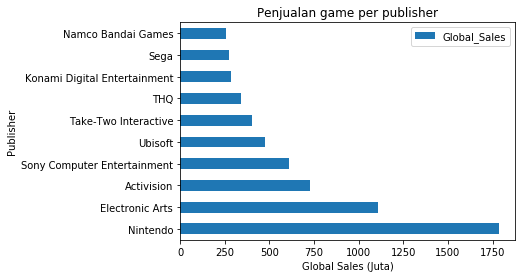

In [109]:
publisher_sales.plot(kind="barh", y="Global_Sales", title="Penjualan game per publisher")
plt.xlabel("Global Sales (Juta)")
plt.show()

_Grafik 2.8 Penjualan Video Game berdasarkan Total Global Sales per Publisher 10 Teratas_

Dari grafik dan tabel di atas, didapat bahwa publisher dengan penjualan tertinggi adalah Nintendo dengan selisih yang cukup jauh ke peringkat seterusnya. Bisa dibilang bahwa publisher Nintendo cukup merajai penjualan game.

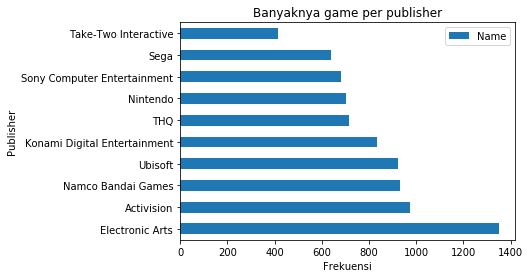

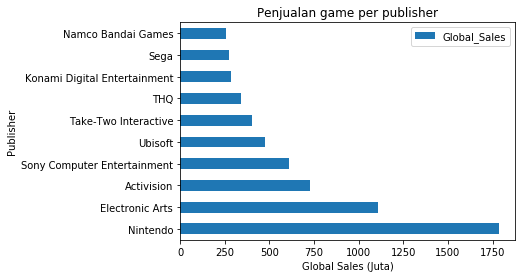

In [87]:
publisher_count.plot(kind="barh",y="Name", title="Banyaknya game per publisher")
plt.xlabel("Frekuensi")
publisher_sales.plot(kind="barh", y="Global_Sales", title="Penjualan game per publisher")
plt.xlabel("Global Sales (Juta)")
plt.show()

_Perbandingan Grafik 2.7 dan Grafik 2.8_

In [117]:
publisher_count["Name"].corr(publisher_sales["Global_Sales"])

0.2401413462659368

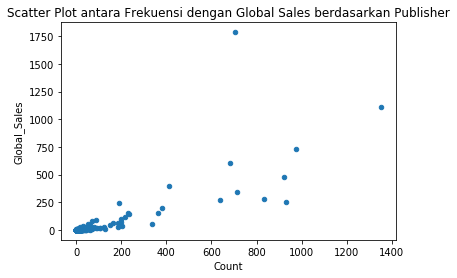

In [121]:
publisher_scatter = pd.DataFrame({"Count": df.groupby("Publisher").count()["Name"], "Global_Sales": df.groupby("Publisher").sum()["Global_Sales"]})
publisher_scatter.plot(kind="scatter", x="Count", y="Global_Sales", title="Scatter Plot antara Frekuensi dengan Global Sales berdasarkan Publisher")
plt.show()

Dilihat dari perbandingan 2 tabel dan nilai korelasi 0.24 yang membuktikan bahwa tidak terlalu ada hubungan berbanding lurus antara banyaknya game yang dirilis publisher dan penjualan game per publisher. Seperti pada contoh Nintendo yang rilis game tidak sebanyak Electronic Arts, tetapi mampu menandingi secara jauh penjualan dari Electronic Arts.

Berbeda dari Genre, Publisher memungkinkan adanya perusahaan Indie yang mampu memproduksi sedikit game, tetapi menghasilkan penjualan yang tinggi sehingga membuat korelasi tidak berbanding lurus.

## Sales tiap Region

### North America (NA)

In [94]:
game_na_sales = df.sort_values("NA_Sales", ascending=False)
game_na_sales.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
15,16,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
18,19,Super Mario World,SNES,1990.0,Platform,Nintendo,12.78,3.75,3.54,0.55,20.61


_Tabel 2.17 Penjualan Video Game berdasarkan NA Sales 10 Teratas_

Berdasarkan Tabel 2.17, Game yang paling laku terjual di North America adalah Wii Sports.

In [88]:
platform_na_sales = df.groupby("Platform").sum().sort_values("NA_Sales", ascending=False)[["NA_Sales"]]
platform_na_sales.head(10)

,NA_Sales
Platform,
X360,601.05
PS2,583.84
Wii,507.71
PS3,392.26
DS,390.71
PS,336.51
GBA,187.54
XB,186.69
N64,139.02


_Tabel 2.18 Penjualan Video Game berdasarkan NA Sales pada tiap Platform 10 Teratas_

Berdasarkan Tabel 2.18, Platform yang paling menjual game di North America adalah X360.

In [89]:
genre_na_sales = df.groupby("Genre").sum().sort_values("NA_Sales", ascending=False)[["NA_Sales"]]
genre_na_sales

,NA_Sales
Genre,
Action,877.83
Sports,683.35
Shooter,582.60
Platform,447.05
Misc,410.24
Racing,359.42
Role-Playing,327.28
Fighting,223.59
Simulation,183.31


_Tabel 2.19 Penjualan Video Game berdasarkan NA Sales pada tiap Platform_

Berdasarkan Tabel 2.19, Genre yang paling menjual game di North America adalah Action.

In [95]:
publisher_na_sales = df.groupby("Publisher").sum().sort_values("NA_Sales", ascending=False)[["NA_Sales"]]
publisher_na_sales.head(10)

,NA_Sales
Publisher,
Nintendo,816.87
Electronic Arts,595.07
Activision,429.70
Sony Computer Entertainment,265.22
Ubisoft,253.43
Take-Two Interactive,220.49
THQ,208.77
Microsoft Game Studios,155.35
Atari,110.04


_Tabel 2.20 Penjualan Video Game berdasarkan NA Sales pada tiap Publisher 10 Teratas_

Berdasarkan Tabel 2.20, Publiser yang paling menjual game di North America adalah Nintendo.

### EU (Europe)

In [44]:
game_eu_sales = df.sort_values("EU_Sales", ascending=False)
game_eu_sales.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
10,11,Nintendogs,DS,2005.0,Simulation,Nintendo,9.07,11.00,1.93,2.75,24.76
16,17,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
19,20,Brain Age: Train Your Brain in Minutes a Day,DS,2005.0,Misc,Nintendo,4.75,9.26,4.16,2.05,20.22
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
14,15,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,9.09,8.59,2.53,1.79,22.00


_Tabel 2.21 Penjualan Video Game berdasarkan EU Sales 10 Teratas_

Berdasarkan Tabel 2.21, Game yang paling laku terjual di Europe adalah Wii Sports.

In [96]:
platform_eu_sales = df.groupby("Platform").sum().sort_values("EU_Sales", ascending=False)[["EU_Sales"]]
platform_eu_sales.head(10)

,EU_Sales
Platform,
PS3,343.71
PS2,339.29
X360,280.58
Wii,268.38
PS,213.60
DS,194.65
PC,139.68
PS4,123.70
GBA,75.25


_Tabel 2.22 Penjualan Video Game berdasarkan EU Sales pada tiap Platform 10 Teratas_

Berdasarkan Tabel 2.22, Platform yang paling menjual game di Europe adalah PS3.

In [97]:
genre_eu_sales = df.groupby("Genre").sum().sort_values("EU_Sales", ascending=False)[["EU_Sales"]]
genre_eu_sales

,EU_Sales
Genre,
Action,525.00
Sports,376.85
Shooter,313.27
Racing,238.39
Misc,215.98
Platform,201.63
Role-Playing,188.06
Simulation,113.38
Fighting,101.32


_Tabel 2.23 Penjualan Video Game berdasarkan EU Sales pada tiap Genre_

Berdasarkan Tabel 2.23, Genre yang paling menjual game di Europe adalah Action.

In [98]:
publisher_eu_sales = df.groupby("Publisher").sum().sort_values("EU_Sales", ascending=False)[["EU_Sales"]]
publisher_eu_sales.head(10)

,EU_Sales
Publisher,
Nintendo,418.74
Electronic Arts,371.27
Activision,215.53
Sony Computer Entertainment,187.72
Ubisoft,163.32
Take-Two Interactive,118.14
THQ,94.73
Sega,82.00
Konami Digital Entertainment,69.69


_Tabel 2.24 Penjualan Video Game berdasarkan EU Sales pada tiap Publisher 10 Teratas_

Berdasarkan Tabel 2.24, Publiser yang paling menjual game di Europe adalah Nintendo.

### Japan (JP)

In [48]:
game_jp_sales = df.sort_values("JP_Sales", ascending=False)
game_jp_sales.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
12,13,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.10
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
20,21,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,Nintendo,6.42,4.52,6.04,1.37,18.36
26,27,Pokemon Black/Pokemon White,DS,2010.0,Role-Playing,Nintendo,5.57,3.28,5.65,0.82,15.32
25,26,Pokemon Ruby/Pokemon Sapphire,GBA,2002.0,Role-Playing,Nintendo,6.06,3.90,5.38,0.50,15.85
41,42,Animal Crossing: Wild World,DS,2005.0,Simulation,Nintendo,2.55,3.52,5.33,0.88,12.27
27,28,Brain Age 2: More Training in Minutes a Day,DS,2005.0,Puzzle,Nintendo,3.44,5.36,5.32,1.18,15.30
214,215,Monster Hunter Freedom 3,PSP,2010.0,Role-Playing,Capcom,0.00,0.00,4.87,0.00,4.87


_Tabel 2.25 Penjualan Video Game berdasarkan JP Sales 10 Teratas_

Berdasarkan Tabel 2.25, Game yang paling laku terjual di Europe adalah Pokemon Red/Pokemon Blue.

In [100]:
platform_jp_sales = df.groupby("Platform").sum().sort_values("JP_Sales", ascending=False)[["JP_Sales"]]
platform_jp_sales.head(10)

,JP_Sales
Platform,
DS,175.57
PS,139.82
PS2,139.20
SNES,116.55
NES,98.65
3DS,97.35
GB,85.12
PS3,79.99
PSP,76.79


_Tabel 2.26 Penjualan Video Game berdasarkan JP Sales pada tiap Platform 10 Teratas_

Berdasarkan Tabel 2.26, Platform yang paling menjual game di Japan adalah DS.

In [99]:
genre_jp_sales = df.groupby("Genre").sum().sort_values("JP_Sales", ascending=False)[["JP_Sales"]]
genre_jp_sales

,JP_Sales
Genre,
Role-Playing,352.31
Action,159.95
Sports,135.37
Platform,130.77
Misc,107.76
Fighting,87.35
Simulation,63.70
Puzzle,57.31
Racing,56.69


_Tabel 2.27 Penjualan Video Game berdasarkan JP Sales pada tiap Genre_

Berdasarkan Tabel 2.27, Genre yang paling menjual game di Japan adalah Role-Playing.

In [101]:
publisher_jp_sales = df.groupby("Publisher").sum().sort_values("JP_Sales", ascending=False)[["JP_Sales"]]
publisher_jp_sales.head(10)

,JP_Sales
Publisher,
Nintendo,455.42
Namco Bandai Games,127.07
Konami Digital Entertainment,91.30
Sony Computer Entertainment,74.10
Capcom,68.08
Sega,57.03
Square Enix,49.88
SquareSoft,40.13
Enix Corporation,32.40


_Tabel 2.28 Penjualan Video Game berdasarkan JP Sales pada tiap Publisher 10 Teratas_

Berdasarkan Tabel 2.28, Publiser yang paling menjual game di Europe adalah Nintendo.

### Other (Region lainnya)

In [52]:
game_other_sales = df.sort_values("Other_Sales", ascending=False)
game_other_sales.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
17,18,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
47,48,Gran Turismo 4,PS2,2004.0,Racing,Sony Computer Entertainment,3.01,0.01,1.10,7.53,11.66
16,17,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
348,349,Pro Evolution Soccer 2008,PS2,2007.0,Sports,Konami Digital Entertainment,0.05,0.00,0.64,2.93,3.63
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
10,11,Nintendogs,DS,2005.0,Simulation,Nintendo,9.07,11.00,1.93,2.75,24.76


_Tabel 2.29 Penjualan Video Game berdasarkan Other Sales 10 Teratas_

Berdasarkan Tabel 2.29, Game yang paling laku terjual di region selain NA, EU, dan JP adalah Grand Theft Auto: San Andreas.

In [102]:
platform_other_sales = df.groupby("Platform").sum().sort_values("Other_Sales", ascending=False)[["Other_Sales"]]
platform_other_sales.head(10)

,Other_Sales
Platform,
PS2,193.44
PS3,141.93
X360,85.54
Wii,80.61
DS,60.53
PS4,43.36
PSP,42.19
PS,40.91
PC,24.86


_Tabel 2.30 Penjualan Video Game berdasarkan Other Sales pada tiap Platform 10 Teratas_

Berdasarkan Tabel 2.30, Platform yang paling menjual game di region selain NA, EU, dan JP  adalah PS2.

In [103]:
genre_other_sales = df.groupby("Genre").sum().sort_values("Other_Sales", ascending=False)[["Other_Sales"]]
genre_other_sales

,Other_Sales
Genre,
Action,187.38
Sports,134.97
Shooter,102.69
Racing,77.27
Misc,75.32
Role-Playing,59.61
Platform,51.59
Fighting,36.68
Simulation,31.52


_Tabel 2.31 Penjualan Video Game berdasarkan Other Sales pada tiap Genre_

Berdasarkan Tabel 2.31, Genre yang paling menjual game di region selain NA, EU, dan JP adalah Action.

In [104]:
publisher_other_sales = df.groupby("Publisher").sum().sort_values("Other_Sales", ascending=False)[["Other_Sales"]]
publisher_other_sales.head(10)

,Other_Sales
Publisher,
Electronic Arts,129.77
Nintendo,95.33
Sony Computer Entertainment,80.45
Activision,75.34
Take-Two Interactive,55.24
Ubisoft,50.26
THQ,32.14
Konami Digital Entertainment,30.31
Sega,24.52


_Tabel 2.32 Penjualan Video Game berdasarkan Other Sales pada tiap Publisher 10 Teratas_

Berdasarkan Tabel 2.32, Publiser yang paling menjual game di region selain NA, EU, dan JP adalah Electronic Arts.

## Year

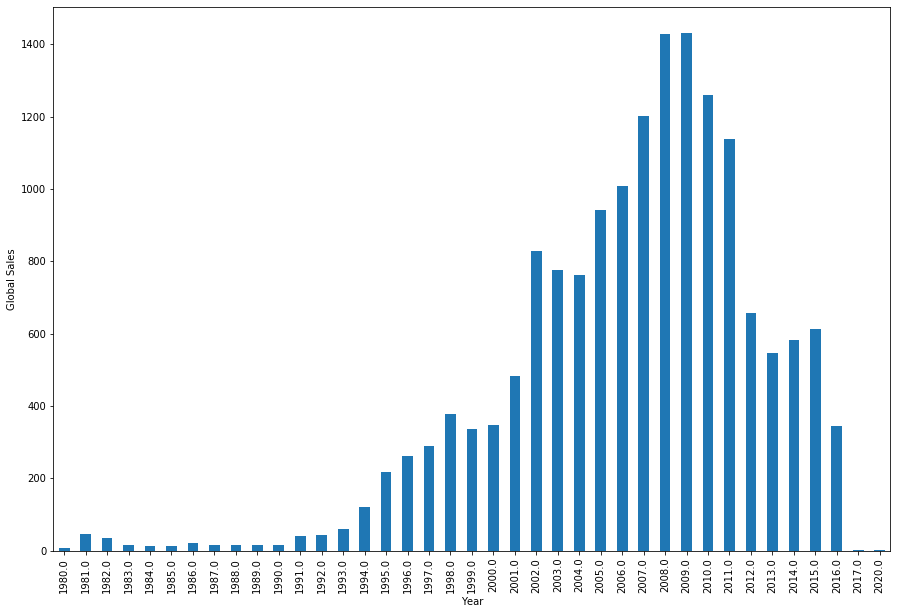

In [56]:
year_count = df.groupby("Year")["Global_Sales"].count()
year_count.plot(kind="bar", figsize=[15, 10])
plt.bar(year_count.index,year_count)
plt.xlabel('Year')
plt.ylabel('Global Sales')
plt.show()

_Grafik 2.9 Banyaknya Judul Video Game per tahun_

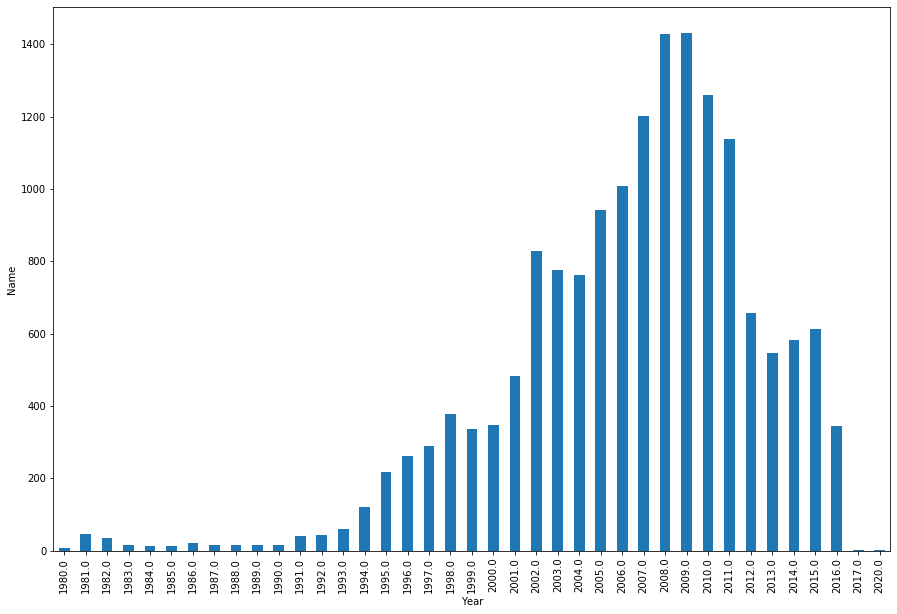

In [57]:
year_sales = df.groupby("Year")["Name"].count()
year_sales.plot(kind="bar", figsize=[15, 10])
plt.bar(year_sales.index,year_sales)
plt.xlabel('Year')
plt.ylabel('Name')
plt.show()

_Grafik 2.10 Penjualan Video Game berdasarkan Global Sales per tahun_

Bisa dilihat pada Grafik 2.10, tren penjualan video game memuncak pada sekitar tahun 2008 dan 2009. Pada grafik setelah tahun 2016 tidak ada data yang ditampilkan, ini berarti data penjualan setelah 2016 tidak dimasukkan ke dalam data. Oleh karena itu, walaupun terdapat data game yang rilis sampai pada tahun 2020, tetapi untuk data global sales tidak berlaku demikian karena ketidakadaan data pada tahun setelah 2016

# Kesimpulan Analisis

Berdasarkan analisis data pada bagian sebelumnya, didapat bahwa data penjualan dapat dibilang valid sampai tahun 2016 saja walaupun terdapat game yang rilis tahun 2020 dan masuk ke dalam data.

Kesimpulan dari Platform:
- Nilai korelasi antara frekuensi dan penjualan adalah 0.90
- Korelasi berbanding lurus

Kesimpulan dari Genre:
- Nilai korelasi antara frekuensi dan penjualan adalah 0.89
- Korelasi berbanding lurus

Kesimpulan dari Publisher:
- Nilai korelasi antara frekuensi dan penjualan adalah 0.24
- Korelasi tidak berbanding lurus

Berbeda dari Genre dan Platform, Publisher memungkinkan adanya perusahaan Indie yang mampu memproduksi sedikit game, tetapi menghasilkan penjualan yang tinggi sehingga membuat korelasi tidak berbanding lurus.

Kesimpulan berdasarkan Global Sales :
- Game paling laku terjual adalah Wii Sports
- Platform yang paling banyak menjual game adalah PS2 dan yang paling banyak merilis game adalah DS
- Genre yang paling banyak menjual game sekaligus merilis game adalah Action 
- Publisher yang paling banyak menjual game adalah Nintendo dan yang paling banyak merilis game adalah Electronic Arts

Untuk region hanya ditinjau berdasarkan sales tiap regionnya saja tidak berdasarkan frekuensinya.
Kesimpulan berdasarkan Region Sales:
1. North America (NA):
    - Game yang paling laku terjual adalah Wii Sports
    - Platform yang paling banyak menjual game adalah X360
    - Genre yang paling banyak menjual game adalah Action
    - Publisher yang paling banyak menjual game adalah Nintendo
2. Europe (EU):
    - Game yang paling laku terjual adalah Wii Sports
    - Platform yang paling banyak menjual game adalah PS3
    - Genre yang paling banyak menjual game di Eropa adalah Action
    - Publisher yang paling banyak menjual game adalah Nintendo
3. Japan (JP):
    - Game yang paling laku terjual adalah Pokemon Red/Pokemon Blue
    - Platform yang paling banyak menjual game adalah DS
    - Genre yang paling banyak menjual game adalah Role-Playing
    - Publisher yang paling banyak menjual game adalah Nintendo
4. Region lain (Other): 
    - Game yang paling laku terjual adalah Grand Theft Auto: San Andreas
    - Platform yang paling banyak menjual game adalah PS2
    - Genre yang paling banyak menjual game adalah Action
    - Publisher yang paling banyak menjual game adalah Electronic Arts

Dilihat berdarkan tahun, tahun yang paling banyak merilis game dan menjual game adalah 2008 dan 2009.

## Data Loss dan Cleansing

In [58]:
stat.iloc[0:1, :]

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.0,16327.0,16598.0,16598.0,16598.0,16598.0,16598.0


Count dari tiap kategori menunjukkan jumlah data yang terdapat di dalam tabel.

Bisa dilihat nilai dari semua kategori adalah sama kecuali pada kolom "Year". Ini berarti terdapat data loss pada "Year" sebesar 1,6327%. Ditambah dari "Rank" maksimumnya adalah 16600, tetapi yang terhitung oleh count hanya 16598 berarti ada 2 data yang hilang. Berarti data loss pada total data sebesar 0.0895%, data loss yang cukup kecil untuk dimensi sebesar ini.

Untuk data cleansing, tidak dilakukan karena bukan data yang salah dan harus dibersihkan melainkan ketidakadaan data dari awalnya sehingga tidak bisa dicleansing.